# Caracteristicas de Imágenes

En este capítulo trataremos de entender que son las características, los descriptores y
por qué son importantes. 

# 2.0  Importancia de las Características

La mayoría de ustedes habrá jugado los juegos de rompecabezas. En este juego, se obtiene una 
gran cantidad de pequeñas piezas de una imagen para ensamblarlas correctamente y 
formar una gran imagen real. 

¿Cómo lo hacemos? ¿Cómo se juega a los rompecabezas? 
¿Cómo arreglas muchas imágenes codificadas en una sola imagen grande? 
¿Cómo se pueden unir muchas imágenes naturales en una sola imagen?

La respuesta es que buscamos patrones específicos o características específicas que son únicas,
que se pueden rastrear fácilmente y se pueden comparar fácilmente. 

Al buscar una definición de tal característica podemos encontrar que es difícil expresarla en palabras, 
pero intutivamente sabemos cuáles son. Cuando armamos un rompecabezas, si alguien nos pide indicar una 
buena característica que se pueda comparar en varias imágenes, podemos señalar una. Buscamos esta 
característica en una imagen, buscamos las misma característica en otras imágenes y las alineamos. 
Hemos visto que incluso los niños pequeños pueden jugar con estos juegos.

¿Se podrá proyectar de la misma teoría a un programa de computador para que este pueda jugar 
a los rompecabezas? ¿Cuáles son estas características más importantes que el 
computador debe detectar?

*Adaptado de https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning


Es difícil decir cómo los humanos encuentran estas características, ya  que está programado 
en nuestro cerebro. Pero si miramos detenidamente algunas imágenes y buscamos diferentes 
patrones encontraremos algo interesante. Por ejemplo, considerando la imagen de abajo:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

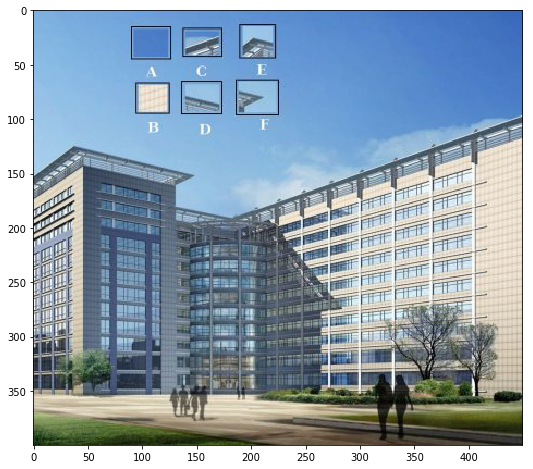

In [2]:
image = Image.open('data/features.jpg')
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter
plt.imshow(image)

En la parte superior de la imagen, se muestran seis pequeñas partes de la imágenen principal. 
¿Podemos encontrar la ubicación exacta de estas partes en la imagen original?. 
¿Cuántos resultados correctos puedemos encontrar?.

* A y B son superficies planas, y se extienden en una gran área. Es difícil encontrar la ubicación 
exacta de estas secciones.

* C y D son mucho más simples. Son bordes del edificio. Se puede encontrar una ubicación aproximada,
pero la ubicación exacta sigue siendo difícil. Esto es porque el borde es el mismo en todas partes. 
Luego el borde es una característica mucho mejor en comparación con el área plana, pero no lo suficientemente 
buena.

* Finalmente, E y F son algunas esquinas del edificio que pueden ser fácilmente descubiertos.
Esto es porque donde quiera que situe la parte que contiene la esquina, haré que la imagen global se verá diferente. 
En vista de esto, las esquinas pueden ser considerados como una buena característica. 

Entonces, ahora que respondimos a la pregunta ¿Cuáles son estas características?. Una nueva pregunta que surge es: 
¿Cómo las encontramos? ¿Como un computador la encuentra? Podemos responder a esta última pregunta de forma intuitiva. 
Lo que hacemos es buscamos regiones en la imágen que tienen la máxima variación entorno a las regiones que lo rodean. 
Encontrar estas características de la imagen se llama detección de características.

Una vez que lo hemos encontrado estas caracteristicas podriamos querer encontrar las mismas en otras imágenes. 
¿Qué hacemos? Tomamos una región alrededor de la característica, la explicamos con nuestras propias palabras, 
como por ejemplo "la parte superior es cielo azul, la parte inferior es la región de construcción, en ese edificio hay algunos vidrios, etc." 
y buscamos el área con las misma descripcion en otras imágenes.

De manera similar, el computador también debe describir la región alrededor de la característica para que pueda
encontrarla en otras imágenes. Esta descripción se llama "descripción de la características". Una vez que tengo las características y
su descripción, puedo encontrar las mismas características en todas las imágenes que tengo y las puedo utilizar para alinear, apilar o
hacer lo que quiera.

# 2.1 Bordes

La detección de bordes es una herramienta fundamental en la visión computacional, 
particularmente en las áreas de detección y extracción de características. Se pueden
definir como el cambio de intensidad entre dos regiones de la imagen.

La mayoría de las técnicas para detectar bordes utilizan aproximaciones de la primera y 
la segunda derivada de la funcion intensidad de una imagen.

En el caso de funciones de dos o mas dimensiones f(x,y), la derivada es un vector que 
apunta en la dirección de la máxima variación de f(x,y) y cuyo módulo es proporcional a dicha 
variación. Este vector se denomina gradiente y se define como: 
    
\begin{equation}
\nabla f =  \left(\frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y}\right)
\end{equation}


    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

In [4]:
im_empire = np.array(Image.open('data/empire.jpg').convert('L'),'f')
plt.clf() 

<Figure size 1152x576 with 0 Axes>

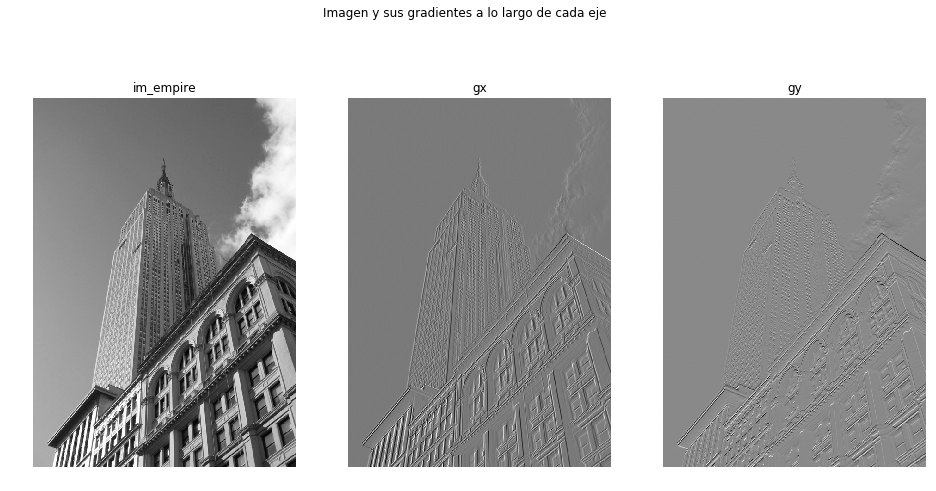

<Figure size 1152x576 with 0 Axes>

In [5]:
# Calculando los gradientes de una imagen de manera simple
gy, gx = np.gradient(im_empire,2)

# Dibujando
plt.close("all")
plt.figure()
plt.suptitle("Imagen y sus gradientes a lo largo de cada eje")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(im_empire , cmap = plt.get_cmap('gray'))
ax.set_title("im_empire")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx, cmap = plt.get_cmap('gray'))
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy, cmap = plt.get_cmap('gray'))
ax.set_title("gy")
plt.show()
plt.clf() 

## 2.1.0 Sobel

El operador Sobel es utilizado en procesamiento de imágenes para detección de bordes. 
Es un operador que calcula una aproximación del gradiente de la función de intensidad
de una imagen.

\begin{equation}
S_x = 
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 \\
\end{bmatrix}
\end{equation}

\begin{equation}
\renewcommand\arraystretch{1.8}
S_y =
\begin{bmatrix}
-1 &-2& -1 \\
 0 & 0&  0 \\ 
+1 &+2& +1 
\end{bmatrix}
\end{equation}

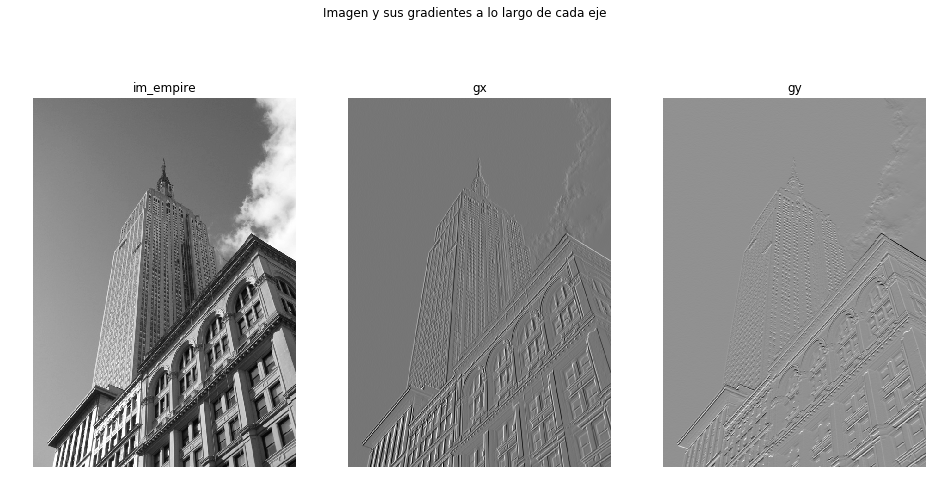

<Figure size 1152x576 with 0 Axes>

In [6]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('data/empire.jpg').convert('L'), 'f')

#Sobel
imx = zeros(im.shape)

filters.sobel(im,1,imx) # Filas (X)

imy = zeros(im.shape)

filters.sobel(im,0,imy) #Columnas (Y)

magnitude = sqrt(imx**2+imy**2)

# Dibujando
plt.close("all")
plt.figure()
plt.suptitle("Imagen y sus gradientes a lo largo de cada eje")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(im, cmap = plt.get_cmap('gray'))
ax.set_title("im_empire")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(imx, cmap = plt.get_cmap('gray'))
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(imy, cmap = plt.get_cmap('gray'))
ax.set_title("gy")
plt.show()
plt.clf() 


## 2.1.1 Filtro Gaussiano

El filtro gaussiano se utiliza en muchos algoritmos de detección de bordes y caracrterísticas en general.



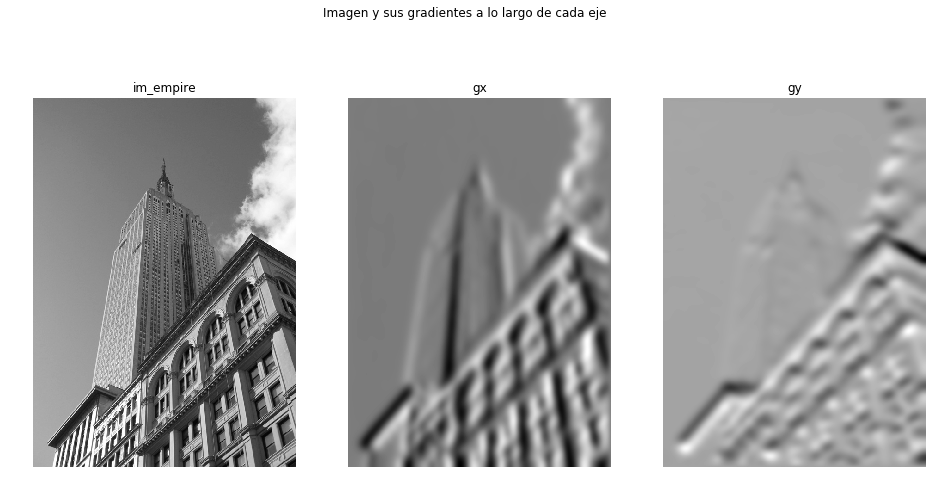

<Figure size 1152x576 with 0 Axes>

In [7]:
im = array(Image.open('data/empire.jpg').convert('L'), 'f')
sigma = 10 #Standard deviation
imx_g = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx_g)
imy_g= zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy_g)

# Dibujando
plt.close("all")
plt.figure()
plt.suptitle("Imagen y sus gradientes a lo largo de cada eje")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(im, cmap = plt.get_cmap('gray'))
ax.set_title("im_empire")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(imx_g, cmap = plt.get_cmap('gray'))
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(imy_g , cmap = plt.get_cmap('gray'))
ax.set_title("gy")
plt.show()
plt.clf() 


# 2.2 Detector de Esquinas Harris

## 2.2.0 Teoría

El algoritmo de detección de esquinas de Harris es uno de los indicadores de esquinas más 
simples disponibles. La idea general es localizar puntos de interés donde el vecindario 
circundante muestra bordes en más de una dirección, es decir, las esquinas de la imagen.

En concreto, queremos encontrar la diferencia en intensidad para un desplazamiento de $(u, v)$ en 
las direcciones $x$ e $y$. Esto se expresa de la siguiente manera:
    
\begin{equation}
E(u,v)= \sum_{x,y}\underbrace{w(x,y)}_{windows-intensity}[\overbrace{I(x+u,y+v)}^{shifted-intensity}-\underbrace{I(x,y)}_{intensity}]^2
\end{equation}

El término $I(x+u,y+v)$ puede ser aproximado utilizando una expansión de Taylor tal que

\begin{equation}
I(x+u,y+v)\approx I(x,y)+ I_x(x,y)u + I_y(x,y)v
\end{equation}

donde $I_x$ $I_y$ son las derivadas o gradientes en las direcciones x e y.

Reemplazando el término anterior en la expresión para $E(u,v)$ se obtiene:

\begin{equation}
E(u,v) \approx  \sum_{x,y}w(x,y)[I_xu + I_yv]^2
\end{equation}

Lo que puede ser reescrito como:
    
\begin{equation}
E(u,v)\approx  (u,v) M \binom{u}{v}
\end{equation}

donde
\begin{equation}
M\approx  \sum_{x,y} w(x,y)\begin{bmatrix}
            I_{x}I_{x}      & I_{x}I_{y}\\
            I_{x}I_{y}      & I_{y}I_{y}
\end{bmatrix}
\end{equation}

Se descubrió que lo que ayuda a determinar una esquina es:

        
\begin{equation}
det(M)\over{traza(M)}
\end{equation}

Otra forma comun que se utiliza para determinar la idoniedad de una venta es el score R,  tal que:

\begin{equation}
R=det(M)-ktraza(M)^2
\end{equation}

donde k es una constante $\in$ \[0.04, 0.06\] y

\begin{equation}
det(M)=\lambda_1\lambda_2
\end{equation}

\begin{equation}
traza(M)=\lambda_1 + \lambda_2
\end{equation}


Todas las ventanas que tienen una puntuación R mayor que un cierto valor son esquinas.

## 2.2.1 Aplicación en Python

La función de respuesta se presenta a continuacion donde el parámetro $\sigma$ define la escala gausseana del filtros usado.

In [8]:
from scipy.ndimage import filters
import numpy as np
def compute_harris_response(im, sigma=3):
    """ Compute the Harris corner detector response function
    for each pixel in a graylevel image. """
    # Derivadas
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    # Calcula las  componentes de la matriz de Harris
    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)
    # Determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    return Wdet / Wtr

Esto proporciona una imagen donde cada píxel contiene el valor de la función de respuesta 
de Harris. Ahora solo se trata de seleccionar la información necesaria de esta imagen.
Un enfoque que a menudo da buenos resultados consiste en tomar todos los puntos con valores 
superiores a un umbral con la restricción adicional de que las esquinas debe separarse con una distancia mínima. Para ello, tomamos todos los píxeles candidatos, los ordenamos en orden descendente y marcamos las regiones demasiados cerca de las posiciones ya marcadas como esquinas.

In [9]:
def get_harris_points(harrisim, min_dist=10, threshold=0.01):
    """ Return corners from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary. """
    # Find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1
    # Get coordinates of candidates
    coords = np.array(harrisim_t.nonzero()).T
    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    # Sort candidates
    index = np.argsort(candidate_values)
    # Store allowed point locations in array
    allowed_locations = np.zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    # Select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
            (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords

Ahora tenemos todo lo que necesitamos para detectar esquinas en imágenes. Para mostrar 
una esquina agregamos en la imagen podemos usar el sieguiente código:

In [10]:
import matplotlib.pyplot as plt
def plot_harris_points(image,filtered_coords):
    """ Dibuja las esquinas en las imagenes"""
 
    plt.figure()
    plt.gray()
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'*')
    plt.axis('off')
    plt.show()

In [11]:
im = np.array(Image.open('data/empire.jpg').convert('L'))
harrisim = compute_harris_response(im)
filtered_coords1 = get_harris_points(harrisim,10, 0.01)
filtered_coords2 = get_harris_points(harrisim,10, 0.05)
filtered_coords3 = get_harris_points(harrisim,10, 0.1)

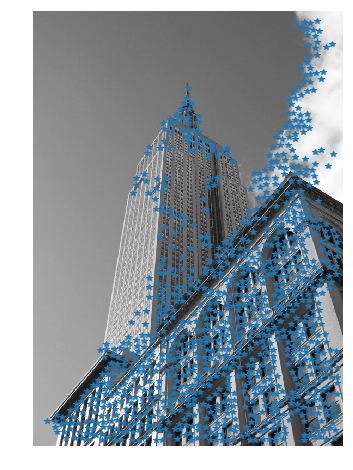

In [12]:
#Dibujando las esquinas
plot_harris_points(im, filtered_coords1)

In [13]:
#Explorando distintos thresholds
def plot_harris_points(image,filtered_points1,filtered_points2,filtered_points3):
    """ Dibujando los corners """
    plt.figure()
    plt.gray()
    plt.subplot(131)
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_points1],[p[0] for p in filtered_points1],'*')
    plt.axis('off')
    plt.title('TH=0.01')
    plt.subplot(132)
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_points2],[p[0] for p in filtered_points2],'*')
    plt.axis('off')
    plt.title('TH=0.05')
    plt.subplot(133)
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_points3],[p[0] for p in filtered_points3],'*')
    plt.axis('off')
    plt.title('TH=0.1')
    plt.show()

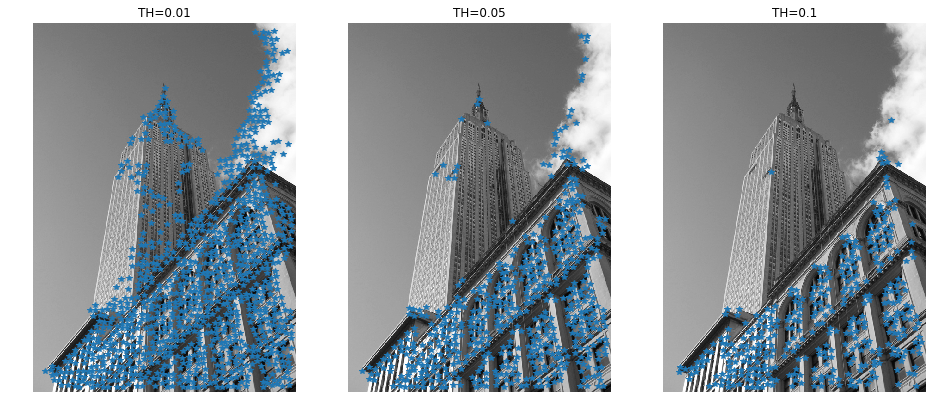

In [14]:
plot_harris_points(im, filtered_coords1, filtered_coords2, filtered_coords3)

## 2.2.2 Encontrar Puntos Correspondientes Entre Imágenes

El detector de esquinas de Harris proporciona puntos de interés de las imágenes, 
pero no contiene un forma de comparar estos puntos de interés con otras imágenes

Lo que necesitamos es agregar un descriptor a cada punto y una forma de comparar los
descriptores. Un descriptor de punto de interés es un vector asignado a este punto 
que describe la apariencia de la imagen alrededor del punto. Cuanto mejor sea el descriptor,
mejores serán las correspondencias. Con la correspondencia de puntos o los puntos 
correspondientes queremos decir puntos en diferentes imágenes que se refieren al mismo objeto 
o punto de escena.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
def get_descriptors(image,filtered_coords,wid=5):
    """Para cada punto retorna los valores de los pixeles alrededor del punto de interes
    usando un vecindario de ancho 2*wid+1."""
    desc = []
    for coords in filtered_coords:
        patch = image[coords[0]-wid:coords[0]+wid+1,coords[1]-wid:coords[1]+wid+1].flatten()
        desc.append(patch)
    return desc

In [17]:
def match(desc1,desc2,threshold=0.5):
    """Para cada descriptor de esquinas en la primera imagen, 
    selecciona su match en la segunda imagen utilizando
    cross correlation"""
    
    n = len(desc1[0])
    
    # pair-wise distances
    d = -np.ones((len(desc1),len(desc2)))
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            d1 = (desc1[i] - np.mean(desc1[i])) / np.std(desc1[i])
            d2 = (desc2[j] - np.mean(desc2[j])) / np.std(desc2[j])
            ncc_value = sum(d1 * d2) / (n-1) 
            if ncc_value > threshold:
                d[i,j] = ncc_value
            
    ndx = np.argsort(-d)
    matchscores = ndx[:,0]
    
    return matchscores


In [18]:
def match_twosided(desc1,desc2,threshold=0.5):
    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
    ndx_12 = np.where(matches_12 >= 0)[0]
    #Remueve los matchs que no son simetricos
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1
    return matches_12

In [19]:
def appendimages(im1,im2):
    """ Return a new image that appends the two images side-by-side. """
    # select the image with the fewest rows and fill in enough empty rows
    rows1 = im1.shape[0]
    rows2 = im2.shape[0]
    if rows1 < rows2:
        im1 = np.concatenate((im1,zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
        im2 = np.concatenate((im2,zeros((rows1-rows2,im2.shape[1]))),axis=0)
    # if none of these cases they are equal, no filling needed.
    return np.concatenate((im1,im2), axis=1)

In [20]:
def plot_matches(im1,im2,locs1,locs2,matchscores,show_below=True):
    """ Show a figure with lines joining the accepted matches
    input: im1,im2 (images as arrays), locs1,locs2 (feature locations),
    matchscores (as output from ’match()’),
    show_below (if images should be shown below matches). """
    im3 = appendimages(im1,im2)
    if show_below:
        im3 = np.vstack((im3,im3))
        plt.imshow(im3)
        cols1 = im1.shape[1]
    for i,m in enumerate(matchscores):
        if m>0:
            plt.plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'c')
            plt.axis('off')

In [21]:
im1 = np.array(Image.open('data/crans_1_small.jpg').convert('L'))
im2 = np.array(Image.open('data/crans_2_small.jpg').convert('L'))


In [22]:
wid = 50
harrisim1 = compute_harris_response(im1,3)
filtered_coords1 = get_harris_points(harrisim1,wid+1)
d1 = get_descriptors(im1,filtered_coords1,wid)
harrisim2 = compute_harris_response(im2,3)
filtered_coords2 = get_harris_points(harrisim2,wid+1)
d2 = get_descriptors(im2,filtered_coords2,wid)
print ('Starting Matching')


Starting Matching


In [23]:
matches = match_twosided(d1,d2)
matches

array([20, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 65, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, 45, 57, -1, -1, -1, -1, -1, -1, -1, -1, 38, -1, -1, 26,
       -1, 61, -1, -1, -1, -1, -1, 13, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])

Graficando

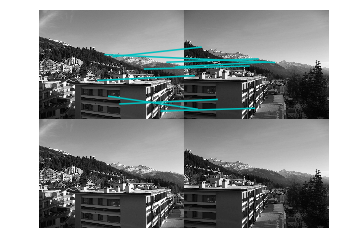

In [24]:
plt.figure()
plt.gray()
plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches)
plt.show()

## 2.2.3 Detector de Esquinas de Harris con OpenCV

OpenCV es una biblioteca libre de visión computacion desarrollada por Intel. Actualmente OpenCV
admite una amplia variedad de lenguajes de programación como C ++, Python, Java, etc. y está disponible en diferentes plataformas, 
incluidas Windows, Linux, OS X, Android, iOS, etc.

OpenCV-Python es la API de Python de OpenCV. Combina las mejores cualidades de la API OpenCV C ++ y 
el lenguaje Python.

El detector de esquins de Harris puede ser facilmente usado de la siguiente manera:

## Detector de Esquinas de Harris

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [26]:
#Abriendo archivos
filename = 'data/cheess.jpg'
img = cv2.imread(filename)
#Convirtiendo a escala de grises
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Fijando parametros
block_size = 5 #Tamaño de la ventana 
aperture = 3 #Apertura del parametro Sobel para calcular la derivada
free_parameter = 0.04

In [27]:
# Detector de esquinas
detector_responses = cv2.cornerHarris(gray, block_size, aperture, free_parameter)

In [28]:
#Marcador de esquinas
detector_responses = cv2.dilate(detector_responses, None)

In [29]:
#Manterner solo esquinas que son superiores al umbral y marcarlas
threshold = 0.01
img[detector_responses > threshold * detector_responses.max()] = [255,0,0]

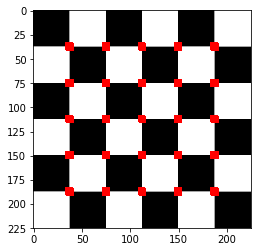

In [30]:
#Desplegando la imagen con las esquinas con matplotlib
plt.imshow(img)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [32]:
plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

# 2.3 Detector de Características Scale-Invariant Feature Transform (SIFT)

Un buen número de los algoritmos de detección de características se basan en la detección de esquinas
ya que en general estas son invariantes a la rotación, lo que significa que si la imagen se gira, 
podemos encontrar las mismas esquinas. Sin embargo, si escalamos la imagen no encontraremos las mismas esquinas,
lo que significa que estos algoritmos son invariante al cambio de escala.

En CV en general, se quiere detectar caracteristicas que no esten basadas en los raw pixels por que
son sensibles a los cambios de escala, rotación y cambios en la iluminación. 

Un algoritmo que es invariante a la rotacion y a los cambios de escala es SIFT, que fue publicado en 1999 por David 
Bowe. La idea de SIFT es detectar puntos claves (key points o caracteristicas) y generar descriptores para estos 
puntos que nos permitan realizar procesos mas complicados con imagenes, como por ejemplo alinear.

SIFT esta incluido en OpenCV, sin embargo la forma de usarlo cambia segun la version de OpenCV que estemos 
utilizando.



## 2.3.0 SIFT con OpenCV

In [33]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print ('Versión de OpenCV: ' + cv2.__version__)

#Vamos a usar dos imágenes del mismo objeto pero una dezplazada con respecto a la otra y de distinto 
#tamaño.

octo_front = cv2.imread('data/Octopus_Far_Front.jpg')
octo_offset = cv2.imread('data/Octopus_Far_Offset.jpg')

Versión de OpenCV: 3.4.2


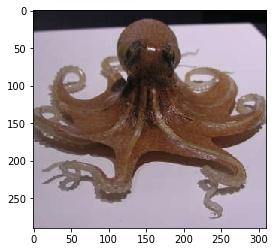

In [34]:
#Creamos una funcion para visulizarla

def show_rgb_img(img):
    """Funcion para desplegar una imagen RGB"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

show_rgb_img(octo_front)


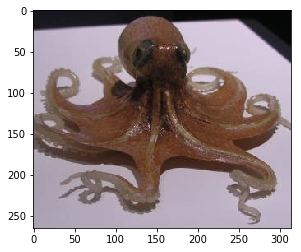

In [35]:
show_rgb_img(octo_offset)

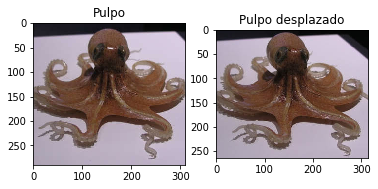

In [36]:
#Si queremos visualizar las dos juntas podemos usar esta funcion

def show_rgb_img2(img1, img2):
    plt.close("all")
    plt.figure()
    ax = plt.subplot("121")
    ax.imshow(cv2.cvtColor(img1, cv2.CV_32S))
    ax.set_title("Pulpo")
    ax = plt.subplot("122")
    ax.imshow(cv2.cvtColor(img2, cv2.CV_32S))
    ax.set_title("Pulpo desplazado")
    return plt.show()
  
show_rgb_img2(octo_front,octo_offset)

In [37]:
#Definimos una funcion que transforma una imagen a escala de grises
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY) #OpenCV usa el modelo de color BGR y a nosotros nos gusta el RBG
    return gray

In [38]:
#Cambiando a escala de grises
octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)


In [39]:
#Definimos una funcion que llama a SIFT para retornar caracteristicas y sus descriptores
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp son los puntos clave o caracteristicas
    # desc corresponde a los decriptores,
   
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

In [40]:
#Definimos una funcion que nos permita graficar estas caracteristicas en la imagen
def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))


In [41]:
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

Características de la Imagen


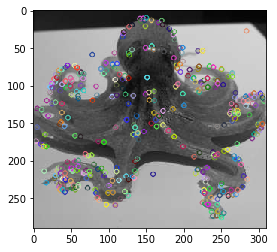

In [42]:
print ('Características de la Imagen')
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

##  2.3.1 Encontrar Puntos Correspondientes con SIFT

### Brute-Force Matcher 

Ahora queremos hacer match entre las caracteristicas de las dos imágenes. Para hacer match entre los puntos vamos 
a usar un Brute-Force Matcher (algoritmo de fuerza bruta). La idea del algoritmo Brute-Force Matcher es simple, 
toma el descriptor de una característica en el primer conjunto y la compara con todas las demás características del 
usando alguna medida de distancia para devolver el más cercano.

Lo primero que se hace es crear un objeto BFMatcher usando cv2.BFMatcher(). Este requiere dos parámetros opcionales. El primero es normType el cual especifica la medida de distancia a utilizar. 
primero es el tipo de distancia que se usa para comprar, que por defecto es cv2.NORM_L2 (distacia euclidiana), que es 
buena cuando se usa SIFT y SURF (cv2.NORM_L1 también está se puede usar). 

Para ORB, BRIEF, BRISK y otros algoritmos se debe usar cv2.NORM_HAMMING, que utiliza la distancia de Hamming como 
medida. 

El segundo parámetro es una variable booleana, crossCheck que es falso por defecto. Si es cierto, solo se retornan 
coincidencias para descriptores del grupo A y del grupo B tal que el decriptor en la posición i del grupo A 
tiene al j-ésimo descriptor en el conjunto B como la mejor coincidencia y viceversa. Es decir, las dos características 
en ambos conjuntos deben coincidir entre sí.


*Distancia euclideana: https://es.wikipedia.org/wiki/Distancia_euclidiana
        
*Otra medidas de distancia (normas), revisar p-norm: https://en.wikipedia.org/wiki/Norm_(mathematics)

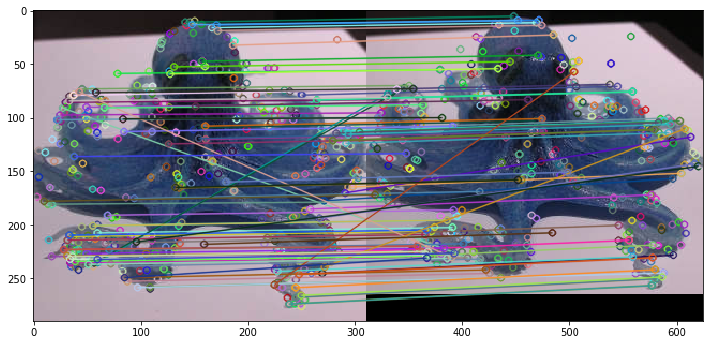

In [43]:
# Creamos un objeto BFMatcher para hacer match entre las caracteristicas de dos imagenes
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Ordenamos los marcadores segun la distancia
matches = sorted(matches, key = lambda x:x.distance)

# Dibujamos los N primeros matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

In [44]:
#Inspeccionando un punto de interés
def explain_keypoint(kp):
    print ('Angulo\n', kp.angle)
    print ('\nClass ID\n', kp.class_id)#Id de la caracterista cuando corremos un algoritmo de clusterizacion previo
    print ('\nOctave \n', kp.octave) #Escala de imagen donde la caracteristica es más fuerte)
    print ('\nPt (x,y)\n', kp.pt) #Coordenadas del punto clave
    print ('\nRespuesta\n', kp.response) #Respuesta del punto clave más fuerte
    print ('\nTamano\n', kp.size) #Tamaño de la caracteristica
explain_keypoint(octo_front_kp[0])   

Angulo
 104.3580322265625

Class ID
 -1

Octave 
 3080959

Pt (x,y)
 (3.2964999675750732, 173.83004760742188)

Respuesta
 0.027666740119457245

Tamano
 2.3619909286499023


In [45]:
#Inspeccionando un descriptor
octo_front_desc[0]

array([ 20.,   0.,   0.,   0.,   1.,   0.,  19.,  46.,  83.,   2.,   0.,
         0.,   0.,   0.,  19., 139., 154.,   5.,   0.,   0.,   0.,   0.,
         2., 154.,  69.,   2.,   0.,   0.,   0.,   0.,   0.,  87.,  42.,
         0.,   0.,   0.,   0.,   0.,  11.,  73., 154.,  18.,   0.,   0.,
         0.,   0.,  16.,  82., 154.,  45.,   0.,   0.,   0.,   0.,   2.,
        79.,  48.,   2.,   0.,   0.,   1.,   2.,   2.,  26.,  29.,   0.,
         0.,   0.,   0.,   0.,  17., 104.,  74.,   1.,   0.,   0.,   0.,
         0.,  77., 154., 154.,   5.,   0.,   0.,   0.,   0.,  22., 154.,
        40.,   0.,   0.,   0.,   1.,   2.,   1.,   8.,  22.,   0.,   0.,
         0.,   0.,   0.,   1.,  19.,  30.,   0.,   0.,   0.,   0.,   0.,
         6.,  39.,   7.,   0.,   0.,   0.,   0.,   0.,   3.,  14.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

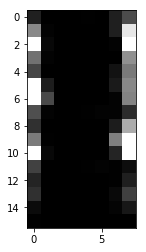

In [46]:
#Visualizando un descriptor
plt.imshow(octo_front_desc[0].reshape(16,8), interpolation='none');

In [47]:
#Inspeccionando matches (https://docs.opencv.org/3.4.2/d2/d29/classcv_1_1KeyPoint.html#details)
def explain_matches(matches):
    print('Distancia\n', matches.distance) # Distance entre los descriptors. Mas baja mejor
    print('Indice del descriptor 2\n', matches.queryIdx) # Indice de la fila del decsriptor 1
    print('Indice del descriptor 1\n', matches.trainIdx) # Indice de la fila del descriptor 2
    print('Indice de la imagen\n', matches.imgIdx)   # Indice de la imagen (util cuando usamos varias imagenes) 

explain_matches(matches[0])

Distancia
 44.76605987548828
Indice del descriptor 2
 231
Indice del descriptor 1
 226
Indice de la imagen
 0


Si quiero una lista para explorar la correspondencia de los puntos. Es decir, si quiero
saber para cada descriptor de la imagen 1 el descriptor que le corresponde en la imagen 2 debo explorar matches

In [48]:
# Para visualizar los matchs debo crear listas con los puntos correspondientes de cada imagen

list_kp1 = []
list_kp2 = []

for mat in matches:

    # Obtener los puntos de cada imagen
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columnas
    # y - filas
    
    # Obtener las coordenadas
    
    (x1,y1) = octo_front_kp[img1_idx].pt
    (x2,y2) = octo_offset_kp[img2_idx].pt

    # Agregar a la lista
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

# 2.4 Detector de Características Speeded-Up Robust Features (SURF)

El algoritmo de SURF está basado en más o menos en los mismos principios y pasos que el SIFT, pero es más rápido
(aproximadamente tres veces más rapido) y entrega menos caracteristicas. Este SURF algoritmo fue desarrollado por 
Herbert Bay Al en el 2006 y al igual que SIFT está patentado luego su uso comercial está restringido.

Fuente: https://es.wikipedia.org/wiki/SURF

In [49]:
#Definimos una funcion que llama a SIFT para retornar caracteristicas y sus descriptores
def gen_surf_features(gray_img):
    surf= cv2.xfeatures2d.SURF_create()
    # kp son los puntos clave o caracteristicas
    #
    # desc corresponde a los decriptores,
   
    kp, desc = surf.detectAndCompute(gray_img, None)
    return kp, desc

In [50]:
#Y una funcion que nos permita graficar estas caracteristicas en la imagen
def show_surf_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

In [51]:
octo_front_kp_surf, octo_front_desc_surf = gen_sift_features(octo_front_gray)
octo_offset_kp_surf, octo_offset_desc_surf = gen_sift_features(octo_offset_gray)

Caracteristicas de la Imagen con SURF


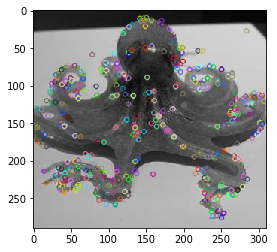

In [52]:
print ('Caracteristicas de la Imagen con SURF')
show_sift_features(octo_front_gray, octo_front, octo_front_kp_surf)

# 2.5 Detector de Características Oriented FAST and Rotated BRIEF (ORB)

Alternativa gratuita a SIFT y SURF desarrollada por Ethan Rublee, Vincent Rabaud, Kurt Konolige
and Gary R. Bradski en su paper ORB: An efficient alternative to SIFT or SURF en 2011 del 
laboratorio de OpenCV.

Fuente: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_orb/py_orb.html

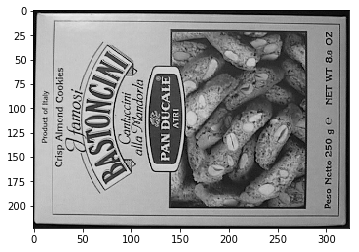

In [53]:
import cv2
import matplotlib.pyplot as plt

#Desplegando imágenes

img1_color = cv2.imread('data/box.png')          # Caja
img2_color = cv2.imread('data/box_in_scene.png') # Escena con la caja (Donde quiero poner la caja)

plt.imshow(img1_color)

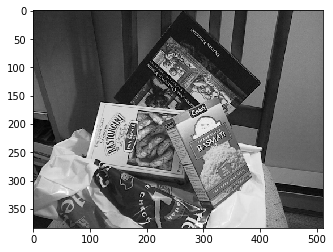

In [54]:
plt.imshow(img2_color)

In [55]:
#Abriendo las imagenes y convirtiendo a gris

img1 = cv2.imread('data/box.png',0)          # Caja
img2 = cv2.imread('data/box_in_scene.png',0) # Escena con la caja (Donde quiero poner la caja)

# Iniciando el detector

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [56]:
#Para ver los puntos lo podemos hacer del mismo modo
#que para ver los puntos de que se obtienen con SIFT o SURF (https://docs.opencv.org/3.4.2/d2/d29/classcv_1_1KeyPoint.html#details)
for keypoint in kp1:
    print(keypoint.pt) # X,Y
    print(keypoint.angle) #Angulo
    print(keypoint.class_id) #Clase (En caso de que hayamos clusterizado)
    print(keypoint.size) #Diametro de la caracteristica
    print(keypoint.response)#Respuesta, intensidad del punto clave
    print(keypoint.octave) #Orb no usa octavas luego siempre es 0

(138.0, 120.0)
221.23345947265625
-1
31.0
0.0063529773615300655
0
(60.0, 77.0)
204.2541961669922
-1
31.0
0.006186218932271004
0
(84.0, 76.0)
20.935165405273438
-1
31.0
0.00549934571608901
0
(56.0, 114.0)
195.93675231933594
-1
31.0
0.006472851615399122
0
(80.0, 134.0)
334.9609680175781
-1
31.0
0.004221291281282902
0
(139.0, 107.0)
125.29264831542969
-1
31.0
0.004272283520549536
0
(96.0, 127.0)
136.82447814941406
-1
31.0
0.004819757305085659
0
(132.0, 74.0)
241.17291259765625
-1
31.0
0.006196460220962763
0
(47.0, 117.0)
182.4127960205078
-1
31.0
0.003940106835216284
0
(138.0, 114.0)
218.15985107421875
-1
31.0
0.005806079600006342
0
(94.0, 119.0)
142.8512725830078
-1
31.0
0.003966415300965309
0
(144.0, 112.0)
327.7493591308594
-1
31.0
0.004579916596412659
0
(58.0, 77.0)
205.86827087402344
-1
31.0
0.004625740461051464
0
(58.0, 132.0)
185.77122497558594
-1
31.0
0.005300737451761961
0
(139.0, 73.0)
285.2029113769531
-1
31.0
0.0047546811401844025
0
(61.0, 144.0)
129.6204376220703
-1
31.0
0.00

4
(64.28160858154297, 68.4288101196289)
213.85720825195312
-1
64.28160858154297
0.0004284022143110633
4
(134.7840118408203, 138.93121337890625)
145.98263549804688
-1
64.28160858154297
0.0007094627944752574
4
(74.64961242675781, 138.93121337890625)
301.1632080078125
-1
64.28160858154297
0.001705572591163218
4
(161.74082946777344, 116.12161254882812)
296.7070617675781
-1
64.28160858154297
0.000306646223179996
4
(70.50241088867188, 118.1952133178711)
18.436704635620117
-1
64.28160858154297
0.0005248297820799053
4
(143.0784149169922, 66.35520935058594)
234.31878662109375
-1
64.28160858154297
0.0010341397719457746
4
(136.8576202392578, 128.56321716308594)
197.32327270507812
-1
64.28160858154297
0.0006772050401195884
4
(74.64961242675781, 126.48961639404297)
3.6325292587280273
-1
64.28160858154297
0.0004031401185784489
4
(134.7840118408203, 120.26881408691406)
216.16282653808594
-1
64.28160858154297
0.00043376930989325047
4
(74.64961242675781, 116.12161254882812)
9.055916786193848
-1
64.2816

In [57]:
#Para enviar a un archivo.csv (separado por comas)
import  csv
index = []

for keypoint in kp1:
    temp = (keypoint.class_id, keypoint.pt, keypoint.size, keypoint.angle, keypoint.response) 
    index.append(temp)

with open("orb_kp1.csv","w") as f:
    wr = csv.writer(f)
    wr.writerows(index)

## 2.5.1 Detectar Puntos Correspondientes con ORB

In [58]:
# Crear objeto BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Hacer match entre descriptores
matches = bf.match(des1,des2)


In [59]:
#Inspeccionando matches (https://docs.opencv.org/3.4.2/d2/d29/classcv_1_1KeyPoint.html#details)
for mat in matches:
    print(mat.distance) # Distance entre los descriptors. Mas baja mejor
    print(mat.queryIdx) # Indice de la fila del descriptor 1
    print(mat.trainIdx) # Indice de la fila del descriptor 2
    print(mat.imgIdx)   # Indice de la imagen (util cuando uso varias imágenes)


78.0
0
447
0
70.0
5
488
0
78.0
6
322
0
67.0
11
390
0
86.0
13
199
0
72.0
14
484
0
82.0
15
435
0
79.0
18
363
0
80.0
19
339
0
81.0
21
238
0
74.0
23
430
0
74.0
27
305
0
73.0
32
483
0
68.0
35
72
0
69.0
37
81
0
74.0
40
45
0
80.0
41
470
0
78.0
42
458
0
71.0
46
145
0
71.0
47
235
0
93.0
48
402
0
60.0
49
487
0
74.0
55
338
0
80.0
56
103
0
66.0
57
50
0
82.0
61
156
0
84.0
64
137
0
76.0
66
230
0
64.0
69
51
0
76.0
74
143
0
69.0
75
289
0
76.0
76
82
0
57.0
77
74
0
75.0
82
18
0
62.0
83
372
0
75.0
84
122
0
75.0
87
207
0
70.0
88
273
0
80.0
90
28
0
80.0
92
222
0
66.0
98
343
0
84.0
99
297
0
79.0
101
253
0
79.0
103
261
0
79.0
105
426
0
60.0
106
318
0
61.0
108
240
0
101.0
109
257
0
81.0
113
54
0
64.0
114
16
0
85.0
115
225
0
67.0
124
189
0
87.0
125
20
0
88.0
128
87
0
81.0
132
428
0
57.0
137
79
0
75.0
138
6
0
77.0
139
24
0
68.0
140
398
0
67.0
142
76
0
70.0
143
403
0
79.0
144
99
0
72.0
145
379
0
69.0
149
119
0
71.0
153
180
0
66.0
160
374
0
72.0
161
214
0
78.0
163
212
0
70.0
165
43
0
78.0
169
29
0
45.0
172
250
0


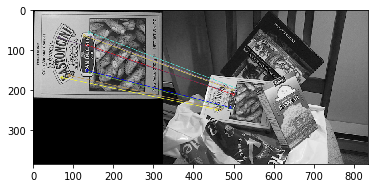

(<matplotlib.image.AxesImage at 0x1143ef358>, None)

In [60]:
# Ordenarlos segun distancia
matches = sorted(matches, key = lambda x:x.distance)

# Dibujando sobre la imagen y suando solo los 10 primero matchs
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()

In [61]:
# Para visualizar los matchs debo crear listas con los puntos correspondientes de cada imagen

list_kp1 = []
list_kp2 = []

for mat in matches:

    # Obtener los puntos de cada imagen
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columnas
    # y - filas
    
    # Obtener las coordenadas
    
    (x1,y1) = kp1[img1_idx].pt
    (x2,y2) = kp2[img2_idx].pt

    # Agregar a la lista
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))